In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
import os
os.listdir("/kaggle/input/personality-dataset")

['personality_datasert.csv']

In [3]:
df = pd.read_csv("/kaggle/input/personality-dataset/personality_datasert.csv")

In [4]:
df.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert


In [5]:
df.shape

(2900, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
df.corr(numeric_only=True)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.718139,-0.735247,-0.701665,-0.718072
Social_event_attendance,-0.718139,1.000000,0.731941,0.718518,0.727732
Going_outside,-0.735247,0.731941,1.000000,0.718327,0.754758
Friends_circle_size,-0.701665,0.718518,0.718327,1.000000,0.690381
Post_frequency,-0.718072,0.727732,0.754758,0.690381,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Personality', ylabel='count'>

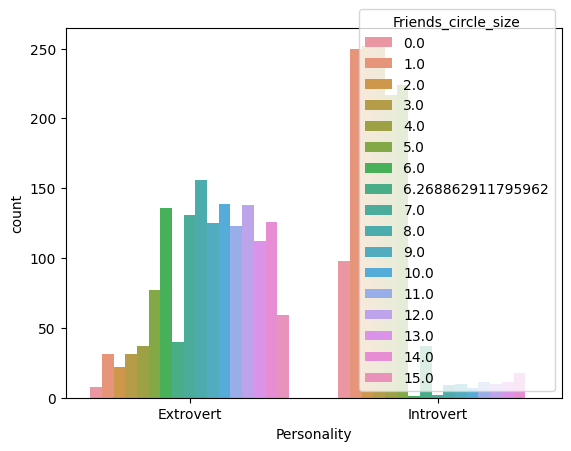

In [10]:
sns.countplot(x='Personality',hue=df['Friends_circle_size'],data=df)

<Axes: xlabel='Personality'>

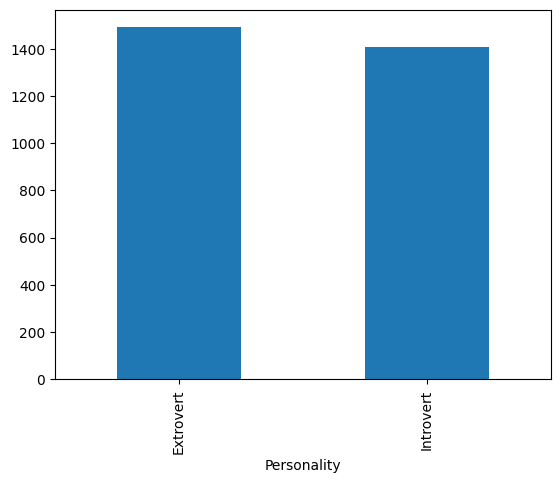

In [11]:
df['Personality'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

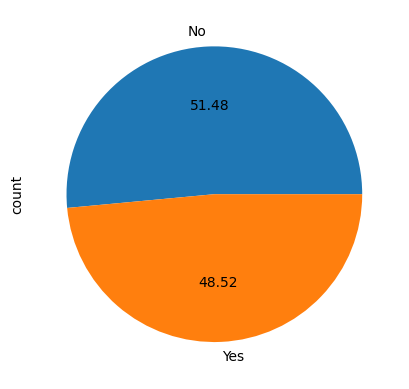

In [12]:
df['Drained_after_socializing'].value_counts().plot(kind='pie',autopct='%.2f')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time_spent_Alone', ylabel='Count'>

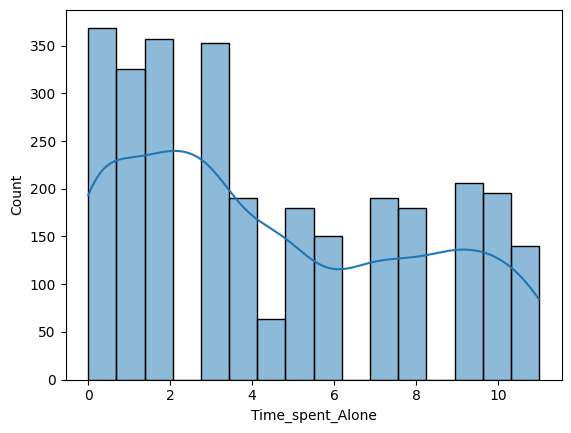

In [13]:
sns.histplot(x='Time_spent_Alone',data=df,kde=True)

<Axes: xlabel='Friends_circle_size'>

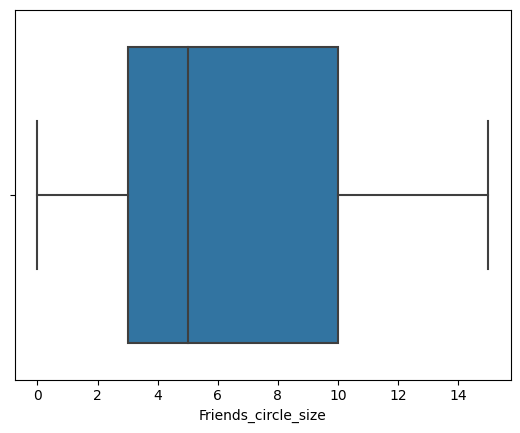

In [14]:
sns.boxplot(x='Friends_circle_size',data=df)

<Axes: xlabel='Time_spent_Alone', ylabel='Going_outside'>

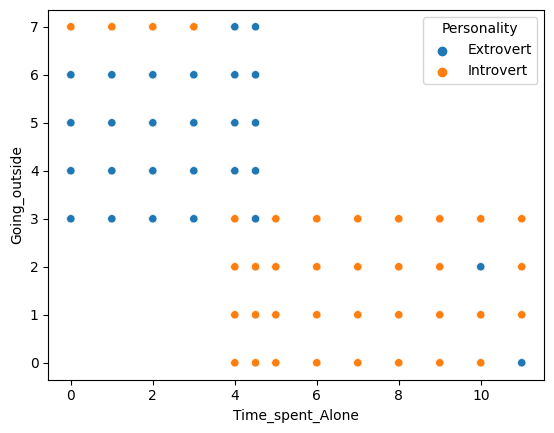

In [15]:
sns.scatterplot(x='Time_spent_Alone',y='Going_outside',data=df,hue=df['Personality'])

In [16]:
X = df.drop(columns=['Personality'],axis=1)
y = df['Personality']

In [17]:
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [18]:
trf = ColumnTransformer(transformers=[
    ('turf1',OneHotEncoder(sparse_output=False,drop='first'),['Stage_fear','Drained_after_socializing'])
],remainder='passthrough')

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [20]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score

In [22]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

In [23]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

Accuracy: 0.9241379310344827


In [24]:
import pickle

# Save the trained model to a file
filename = 'Personality.pkl'
pickle.dump(model, open(filename, 'wb'))